In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('C:/Users/satya/Downloads/Project-2/Project-2/heart.csv')
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 4: Train the Random Forest model
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = classifier.predict(X_test)

# Step 6: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



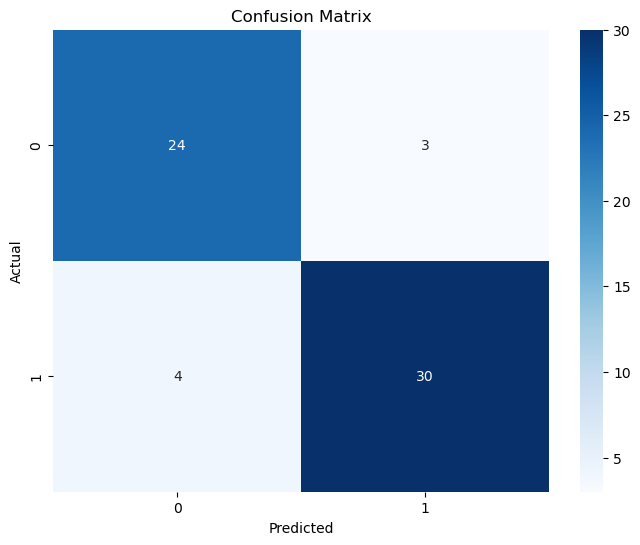

In [56]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
# Display the ranges of features in the training set
for feature in X.columns:
    min_val = X[feature].min()
    max_val = X[feature].max()
    print(f"{feature}: Min = {min_val}, Max = {max_val}")


age: Min = 29, Max = 77
sex: Min = 0, Max = 1
cp: Min = 0, Max = 3
trestbps: Min = 94, Max = 200
chol: Min = 126, Max = 564
fbs: Min = 0, Max = 1
restecg: Min = 0, Max = 2
thalach: Min = 71, Max = 202
exang: Min = 0, Max = 1
oldpeak: Min = 0.0, Max = 6.2
slope: Min = 0, Max = 2
ca: Min = 0, Max = 4
thal: Min = 0, Max = 3


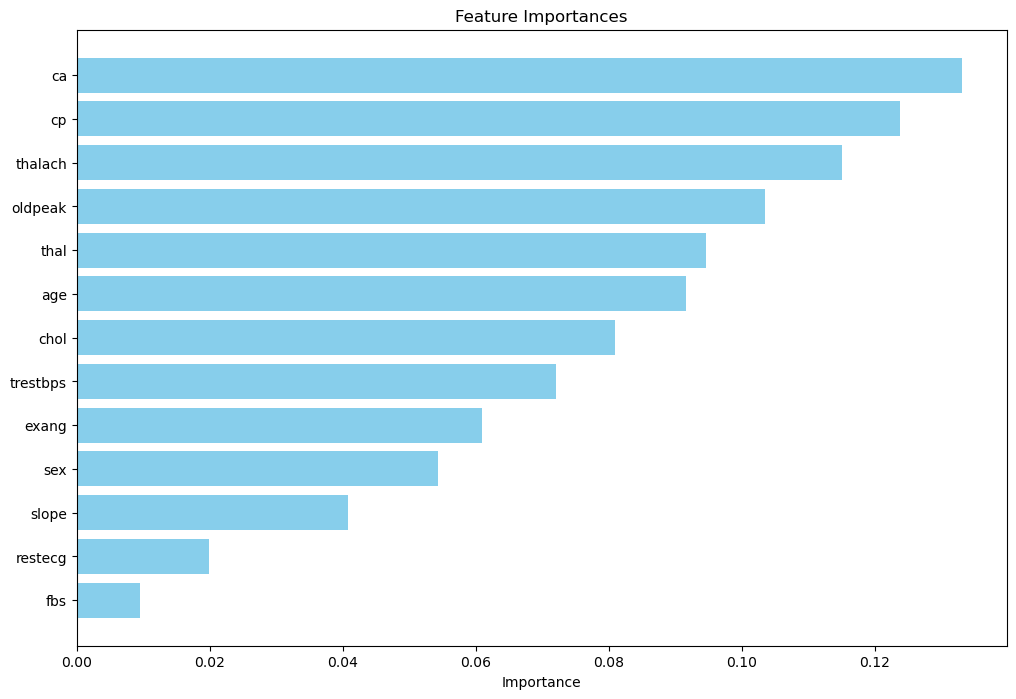

In [27]:
import matplotlib.pyplot as plt

# Feature importances
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
importances = [0.091523, 0.054320, 0.123768, 0.072010, 0.080982, 0.009528, 0.019957, 0.115053, 0.060947, 0.103460, 0.040743, 0.133137, 0.094571]

# Sort by importance
sorted_indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = [importances[i] for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [66]:
# Compare predictions with thresholds
threshold = 0.5
pred_probs = classifier.predict_proba(refined_high_risk_data)
pred_class = (pred_probs[:, 1] >= threshold).astype(int)

print(f"Prediction Probability for High Risk Data: {pred_probs[0]}")
print(f"Predicted Class for High Risk Data: {'Heart Disease' if pred_class[0] == 1 else 'No Heart Disease'}")


Prediction Probability for High Risk Data: [0.54 0.46]
Predicted Class for High Risk Data: No Heart Disease


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
# Check class distribution in training data
print("Training Data Class Distribution:")
print(y_train.value_counts())


Training Data Class Distribution:
1    131
0    111
Name: target, dtype: int64


In [63]:
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(classifier, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Mean CV Score: 0.838087431693989


In [71]:
random_data = np.array([[54, 1, 2, 140, 250, 0, 1, 150, 0, 1.5, 2, 0, 3]])

# Predict whether this person has heart disease
prediction = classifier.predict(random_data)

# Interpret the prediction
if prediction == 1:
    print("Prediction: This individual is likely to have heart disease.")
else:
    print("Prediction: This individual is unlikely to have heart disease.")

Prediction: This individual is likely to have heart disease.


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [72]:
import numpy as np

# Example values for a profile likely not to have heart disease
no_disease_data = np.array([[45, 1, 2, 150, 260, 1, 0, 140, 1, 2.0, 3, 2, 2]])

# Predict whether this person has heart disease
prediction = classifier.predict(no_disease_data)

# Interpret the prediction
if prediction == 1:
    print("Prediction: This individual is likely to have heart disease.")
else:
    print("Prediction: This individual is unlikely to have heart disease.")


Prediction: This individual is unlikely to have heart disease.


C:\Users\satya\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
import joblib


In [69]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [70]:
pip install flask


Note: you may need to restart the kernel to use updated packages.
